In [292]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer


Read or Upload our CSV Files.

In [293]:
df = pd.read_csv("T20DATA.csv")

How many entries are present in the data set

In [294]:
df.shape

(9814, 44)

Taking Information about the Data set.

In [295]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 44 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [296]:
df.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls,wkt_text,isRetiredHurt,text,preText,postText
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"short again, and he gets some extra bounce on ...",NaN,NaN
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,and he'll have to bowl another free-hit after ...,<p>Free-hit</p>,NaN
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"full, and a hint of shape away from off stump....","<p><b>6.58pm</b> Thanks, Andrew M. The MCG is ...",NaN
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"shortish, angling down leg, gloves a pull down...",NaN,NaN
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,NaN,NaN,NaN,NaN,NaN,NaN,False,"length ball close to off stump, straightens a ...",NaN,NaN


Checking is their any NULL value present in the Data Set if yes then how much

In [297]:
df.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

Removing Unnecessary Column from the Data Set

In [298]:
df.drop(["isRetiredHurt","text","preText","postText","wkt_text"],axis = 1,inplace = True)

In [299]:
df.sample(5)

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls
7437,17050,1298144,NAM v UAE,UAE,NAM,UAE,1,8,5,0,...,Bernard Scholtz,2.0,0.0,14.0,0.0,NaN,NaN,NaN,NaN,NaN
154,24060,1298179,ENG v PAK,PAK,ENG,ENG,2,5,5,0,...,Haris Rauf,1.0,0.0,4.0,1.0,NaN,NaN,NaN,NaN,NaN
6539,114030,1298148,AFG v ENG,AFG,ENG,AFG,1,15,3,1,...,Mark Wood,3.0,0.0,15.0,1.0,NaN,NaN,NaN,NaN,NaN
322,113010,1298178,ENG v INDIA,INDIA,ENG,INDIA,1,14,1,1,...,Liam Livingstone,2.0,0.0,11.0,0.0,NaN,NaN,NaN,NaN,NaN
7011,115010,1298146,SCOT v ZIM,SCOT,ZIM,SCOT,1,16,1,1,...,Blessing Muzarabani,3.0,0.0,22.0,0.0,NaN,NaN,NaN,NaN,NaN


In [300]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9814 entries, 0 to 9813
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   comment_id         9814 non-null   int64  
 1   match_id           9814 non-null   int64  
 2   match_name         9814 non-null   object 
 3   home_team          9814 non-null   object 
 4   away_team          9814 non-null   object 
 5   current_innings    9814 non-null   object 
 6   innings_id         9814 non-null   int64  
 7   over               9814 non-null   int64  
 8   ball               9814 non-null   int64  
 9   runs               9814 non-null   int64  
 10  shortText          9814 non-null   object 
 11  isBoundary         9814 non-null   bool   
 12  isWide             9814 non-null   bool   
 13  isNoball           9814 non-null   bool   
 14  batsman1_id        9814 non-null   int64  
 15  batsman1_name      9814 non-null   object 
 16  batsman1_runs      9814 

In [301]:
Num_col =["bowler2_overs","bowler2_maidens","bowler2_runs","bowler2_wkts","wkt_batsman_runs","wkt_batsman_balls"  ]
Cat_col=["bowler2_id","wicket_id"]
name_col=["bowler2_name","wkt_batsman_name","wkt_bowler_name"]

In [302]:
df.isnull().sum()

comment_id              0
match_id                0
match_name              0
home_team               0
away_team               0
current_innings         0
innings_id              0
over                    0
ball                    0
runs                    0
shortText               0
isBoundary              0
isWide                  0
isNoball                0
batsman1_id             0
batsman1_name           0
batsman1_runs           0
batsman1_balls          0
bowler1_id              0
bowler1_name            0
bowler1_overs           0
bowler1_maidens         0
bowler1_runs            0
bowler1_wkts            0
batsman2_id             0
batsman2_name           0
batsman2_runs           0
batsman2_balls          0
bowler2_id            526
bowler2_name          526
bowler2_overs         526
bowler2_maidens       526
bowler2_runs          526
bowler2_wkts          526
wicket_id            9263
wkt_batsman_name     9263
wkt_bowler_name      9263
wkt_batsman_runs     9263
wkt_batsman_

Filling Missing Value or Null Values using Pandas Lib or Sklearn library

In [303]:
si_int = SimpleImputer()
imputer = SimpleImputer(strategy="most_frequent")
si_obj= SimpleImputer(missing_values="EMPTY",strategy="most_frequent")




In [304]:
for i in Num_col:
  df[i]=si_int.fit_transform(df[[i]])



In [309]:
for j in Cat_col:
  df[j]=imputer.fit_transform(df[[j]])

In [310]:
df["bowler2_name"].fillna("Paul van Meekeren",inplace = True)
df['wkt_batsman_name'].fillna("Max O'Dowd",inplace = True)
df['wkt_bowler_name'].fillna("Wanindu Hasaranga de Silva",inplace=True)

In [311]:
df.isnull().sum()

comment_id           0
match_id             0
match_name           0
home_team            0
away_team            0
current_innings      0
innings_id           0
over                 0
ball                 0
runs                 0
shortText            0
isBoundary           0
isWide               0
isNoball             0
batsman1_id          0
batsman1_name        0
batsman1_runs        0
batsman1_balls       0
bowler1_id           0
bowler1_name         0
bowler1_overs        0
bowler1_maidens      0
bowler1_runs         0
bowler1_wkts         0
batsman2_id          0
batsman2_name        0
batsman2_runs        0
batsman2_balls       0
bowler2_id           0
bowler2_name         0
bowler2_overs        0
bowler2_maidens      0
bowler2_runs         0
bowler2_wkts         0
wicket_id            0
wkt_batsman_name     0
wkt_bowler_name      0
wkt_batsman_runs     0
wkt_batsman_balls    0
dtype: int64

Getting Every mathematical counts calculation over the Data.

In [312]:
df.describe()

,comment_id,match_id,innings_id,over,ball,runs,batsman1_id,batsman1_runs,batsman1_balls,bowler1_id,...,batsman2_runs,batsman2_balls,bowler2_id,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_runs,wkt_batsman_balls
count,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9.814000e+03,...,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000,9814.000000,9814.000000,9.814000e+03,9814.000000,9814.000000
mean,85399.661708,1.298157e+06,1.477787,10.082841,3.486856,1.202262,5.377303e+05,15.691971,13.249440,6.226676e+05,...,14.978296,12.738537,6.070251e+05,2.172265,0.031654,14.684755,0.641042,6.390395e+05,15.029038,13.800363
std,78951.670137,1.355630e+01,0.499532,5.623045,1.707484,1.476730,3.181419e+05,16.454378,11.471307,3.276842e+05,...,16.376065,11.596212,3.257367e+05,1.011267,0.177363,9.111999,0.810436,8.009195e+04,3.898429,2.771653
min,110.000000,1.298135e+06,1.000000,1.000000,1.000000,0.000000,5.334000e+03,0.000000,0.000000,8.917000e+03,...,0.000000,0.000000,8.917000e+03,0.100000,0.000000,0.000000,0.000000,5.334000e+03,0.000000,1.000000
25%,18030.000000,1.298145e+06,1.000000,5.000000,2.000000,0.000000,3.089670e+05,4.000000,4.000000,3.481090e+05,...,2.000000,4.000000,3.481090e+05,1.000000,0.000000,8.000000,0.000000,6.431970e+05,15.029038,13.800363
50%,29010.000000,1.298157e+06,1.000000,10.000000,3.000000,1.000000,4.465070e+05,10.000000,10.000000,5.420230e+05,...,9.000000,9.000000,5.264410e+05,2.000000,0.000000,14.000000,0.000000,6.431970e+05,15.029038,13.800363
75%,118040.000000,1.298169e+06,2.000000,15.000000,5.000000,1.000000,7.843670e+05,23.000000,19.000000,9.229430e+05,...,23.000000,19.000000,9.067830e+05,3.000000,0.000000,20.000000,1.000000,6.431970e+05,15.029038,13.800363
max,219090.000000,1.298179e+06,2.000000,20.000000,6.000000,7.000000,1.278252e+06,109.000000,63.000000,1.278252e+06,...,107.000000,63.000000,1.278252e+06,4.000000,2.000000,59.000000,4.000000,1.278252e+06,109.000000,60.000000


Count Every Seperate value in the Data set.

In [313]:
df.columns.tolist

<bound method IndexOpsMixin.tolist of Index(['comment_id', 'match_id', 'match_name', 'home_team', 'away_team',
       'current_innings', 'innings_id', 'over', 'ball', 'runs', 'shortText',
       'isBoundary', 'isWide', 'isNoball', 'batsman1_id', 'batsman1_name',
       'batsman1_runs', 'batsman1_balls', 'bowler1_id', 'bowler1_name',
       'bowler1_overs', 'bowler1_maidens', 'bowler1_runs', 'bowler1_wkts',
       'batsman2_id', 'batsman2_name', 'batsman2_runs', 'batsman2_balls',
       'bowler2_id', 'bowler2_name', 'bowler2_overs', 'bowler2_maidens',
       'bowler2_runs', 'bowler2_wkts', 'wicket_id', 'wkt_batsman_name',
       'wkt_bowler_name', 'wkt_batsman_runs', 'wkt_batsman_balls'],
      dtype='object')>

In [314]:
for i in df.columns:
  print(df[i].value_counts())
  print('.....................')


comment_id
130       42
17040     42
18050     42
18040     42
18030     42
          ..
112080     1
27080      1
19080      1
113080     1
119080     1
Name: count, Length: 316, dtype: int64
.....................
match_id
1298144    250
1298151    250
1298158    250
1298150    250
1298138    249
1298162    248
1298161    247
1298174    247
1298157    247
1298171    246
1298143    246
1298167    246
1298136    245
1298139    244
1298141    244
1298172    244
1298173    244
1298179    243
1298137    241
1298135    241
1298164    240
1298142    240
1298166    240
1298165    239
1298177    238
1298146    238
1298148    237
1298168    236
1298176    236
1298175    234
1298145    232
1298147    230
1298153    229
1298156    228
1298140    227
1298178    222
1298169    222
1298154    217
1298149    214
1298170    211
1298163    205
1298152     77
Name: count, dtype: int64
.....................
match_name
NAM v UAE      250
BAN v NED      250
PAK v ZIM      250
INDIA v PAK    250
IRE v ZIM  

In [315]:
listnew = Num_col + Cat_col

Finding Out The Correlation Between the numeric column in the data set.

In [316]:
df[listnew].corr()

,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wkt_batsman_runs,wkt_batsman_balls,bowler2_id,wicket_id
bowler2_overs,1.000000,0.057585,0.754637,0.433456,0.041375,0.036283,0.016441,-0.005696
bowler2_maidens,0.057585,1.000000,-0.098512,0.140042,-0.022171,-0.022280,-0.027369,-0.004998
bowler2_runs,0.754637,-0.098512,1.000000,0.165457,0.081130,0.062240,-0.021615,-0.009244
bowler2_wkts,0.433456,0.140042,0.165457,1.000000,-0.032714,-0.035873,0.049139,0.014026
wkt_batsman_runs,0.041375,-0.022171,0.081130,-0.032714,1.000000,0.933225,0.001070,-0.082482
wkt_batsman_balls,0.036283,-0.022280,0.062240,-0.035873,0.933225,1.000000,0.001626,-0.080782
bowler2_id,0.016441,-0.027369,-0.021615,0.049139,0.001070,0.001626,1.000000,-0.002604
wicket_id,-0.005696,-0.004998,-0.009244,0.014026,-0.082482,-0.080782,-0.002604,1.000000


#**Visualization Part**

Heap Map

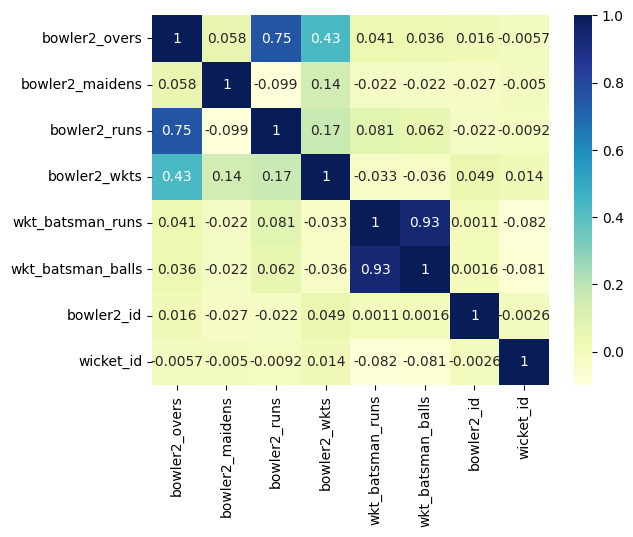

In [285]:
dataplot = sns.heatmap(df[listnew].corr(), cmap="YlGnBu", annot=True)


In [317]:
df.head()

,comment_id,match_id,match_name,home_team,away_team,current_innings,innings_id,over,ball,runs,...,bowler2_name,bowler2_overs,bowler2_maidens,bowler2_runs,bowler2_wkts,wicket_id,wkt_batsman_name,wkt_bowler_name,wkt_batsman_runs,wkt_batsman_balls
0,130,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,0,...,Paul van Meekeren,2.172265,0.031654,14.684755,0.641042,643197.0,Max O'Dowd,Wanindu Hasaranga de Silva,15.029038,13.800363
1,120,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,Paul van Meekeren,2.172265,0.031654,14.684755,0.641042,643197.0,Max O'Dowd,Wanindu Hasaranga de Silva,15.029038,13.800363
2,110,1298179,ENG v PAK,PAK,ENG,PAK,1,1,1,1,...,Paul van Meekeren,2.172265,0.031654,14.684755,0.641042,643197.0,Max O'Dowd,Wanindu Hasaranga de Silva,15.029038,13.800363
3,140,1298179,ENG v PAK,PAK,ENG,PAK,1,1,2,2,...,Paul van Meekeren,2.172265,0.031654,14.684755,0.641042,643197.0,Max O'Dowd,Wanindu Hasaranga de Silva,15.029038,13.800363
4,150,1298179,ENG v PAK,PAK,ENG,PAK,1,1,3,0,...,Paul van Meekeren,2.172265,0.031654,14.684755,0.641042,643197.0,Max O'Dowd,Wanindu Hasaranga de Silva,15.029038,13.800363


Bar Graph

<Axes: xlabel='match_name', ylabel='No. of Matches'>

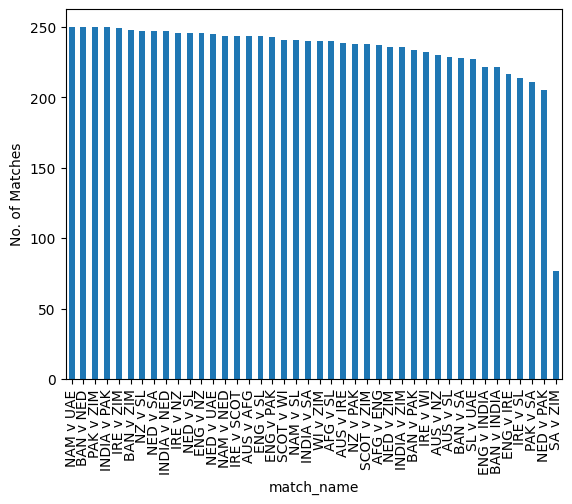

In [318]:
df["match_name"].value_counts().plot(kind="bar",ylabel = "No. of Matches")

<Axes: title={'center': 'Best Five Team Matches'}, xlabel='match_name', ylabel='No. of Matches'>

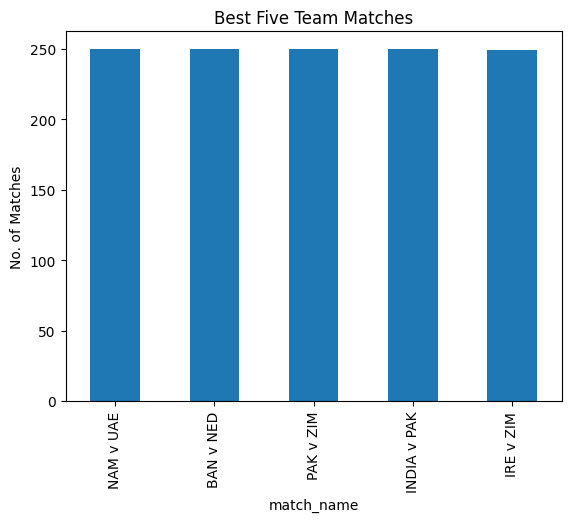

In [319]:
df["match_name"].value_counts().head().plot(kind="bar",ylabel = "No. of Matches",title="Best Five Team Matches")

In [321]:
df.drop(["comment_id","match_id","bowler1_id","batsman1_id","batsman2_id","bowler2_id","wicket_id"],axis = 1,inplace = True)

In [322]:
df["current_innings"].value_counts()

current_innings
NED      971
SL       936
ZIM      893
IRE      826
PAK      814
INDIA    742
ENG      674
NZ       619
BAN      570
SA       475
AUS      455
SCOT     375
NAM      374
AFG      369
WI       366
UAE      355
Name: count, dtype: int64

Histrogram

<Axes: ylabel='Frequency'>

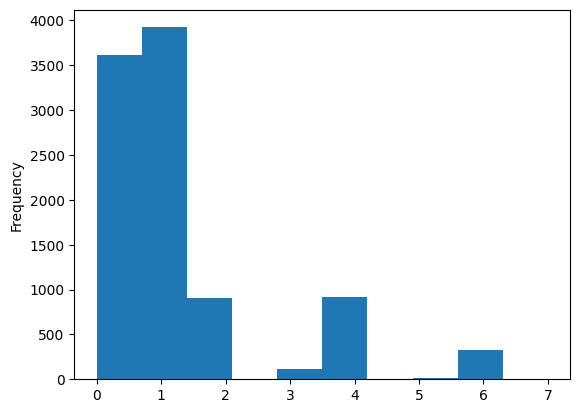

In [323]:
df["runs"].plot(kind="hist")

In [334]:
run=df.groupby("batsman1_name")


Maximum Run Made by Players with their names

In [338]:
run.size()

batsman1_name
Aaron Finch         107
Aayan Afzal Khan     29
Adam Zampa            3
Afif Hossain         81
Aiden Markram        80
                   ... 
Wessly Madhevere     89
Yasir Ali             9
Zahoor Khan           1
Zane Green            3
Zawar Farid           4
Length: 197, dtype: int64

Pie Chart

<Axes: ylabel='count'>

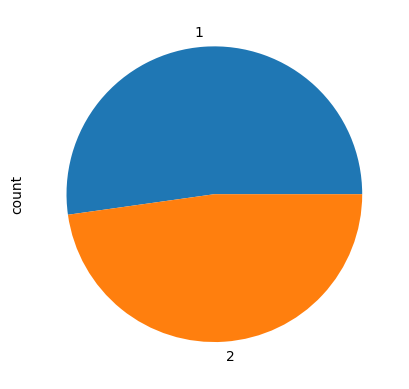

In [349]:
df["innings_id"].value_counts().plot(kind = "pie")

In [400]:
death_over=df[df["bowler1_overs"]<5]
death_over.groupby("bowler1_name")["bowler1_runs"].count()

bowler1_name
Aayan Afzal Khan         48
Adam Zampa               73
Adil Rashid             145
Afif Hossain              6
Ahmed Raza                6
                       ... 
Wayne Parnell            98
Wellington Masakadza     13
Wessly Madhevere         18
Zahoor Khan              76
Zawar Farid              17
Name: bowler1_runs, Length: 132, dtype: int64

In [401]:
mask=df['batsman1_runs']==6
new_delivery = df[mask]

In [402]:
new_delivery.groupby("batsman1_name")["batsman1_runs"].count()

batsman1_name
Aaron Finch         1
Aayan Afzal Khan    2
Afif Hossain        3
Aiden Markram       4
Alex Hales          3
                   ..
Usman Ghani         3
Vikramjit Singh     1
Virat Kohli         4
Vriitya Aravind     7
Wessly Madhevere    3
Name: batsman1_runs, Length: 127, dtype: int64

<Axes: title={'center': 'Top 5 Batsman1'}, xlabel='batsman1_name', ylabel='No. of 6 Run'>

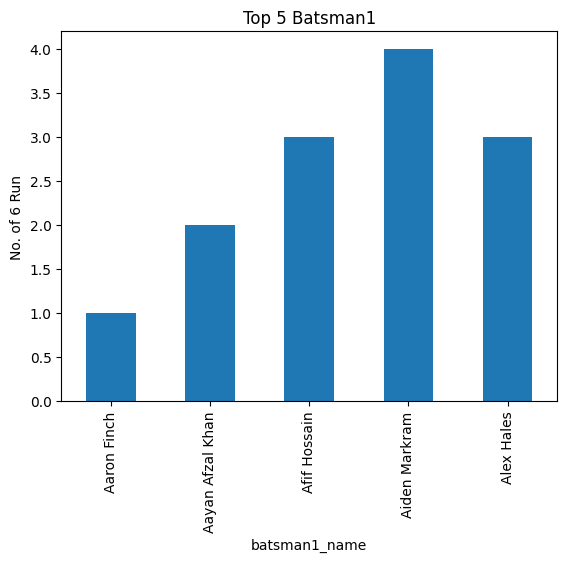

In [403]:
new_delivery.groupby("batsman1_name")["batsman1_runs"].count().head().plot(kind="bar",ylabel="No. of 6 Run",title = "Top 5 Batsman1")

In [404]:
mask1=df['batsman2_runs']==6
new_delivery1 = df[mask1]

In [405]:
new_delivery1.groupby("batsman2_name")["batsman2_runs"].count()

batsman2_name
Aaron Finch          1
Aayan Afzal Khan     4
Aiden Markram        6
Alex Hales           1
Andy Balbirnie      10
                    ..
Tristan Stubbs       5
Usman Ghani         13
Virat Kohli          8
Vriitya Aravind     10
Wessly Madhevere     2
Name: batsman2_runs, Length: 91, dtype: int64

<Axes: title={'center': 'Top 5 Batsman2'}, xlabel='batsman2_name', ylabel='No. of 6 Run'>

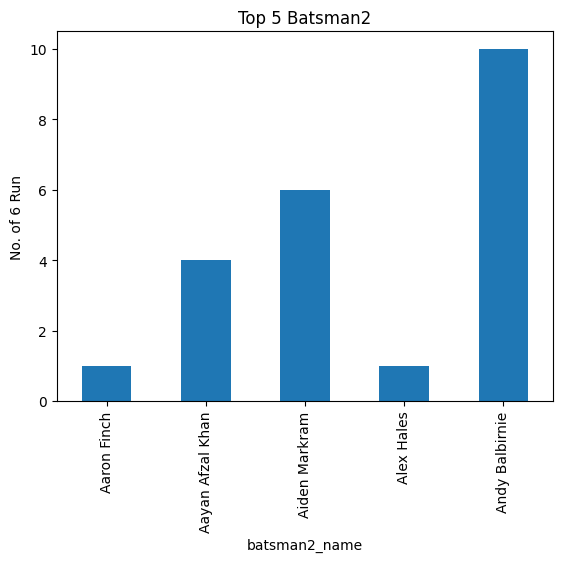

In [410]:
new_delivery1.groupby("batsman2_name")["batsman2_runs"].count().head().plot(kind="bar",ylabel="No. of 6 Run",title = "Top 5 Batsman2")

In [407]:
mask2=df['bowler1_runs']==6
new_delivery2 = df[mask2]


In [411]:
new_delivery2.groupby("bowler1_name")["bowler1_runs"].count()

bowler1_name
Aayan Afzal Khan               5
Adam Zampa                     1
Adil Rashid                    7
Ahmed Raza                     1
Akeal Hosein                   2
                              ..
Wanindu Hasaranga de Silva    13
Wayne Parnell                  8
Wellington Masakadza           1
Wessly Madhevere               1
Zahoor Khan                    5
Name: bowler1_runs, Length: 112, dtype: int64

<Axes: title={'center': 'Top 5 Bowler1'}, xlabel='bowler1_name', ylabel='No. of 6 Run'>

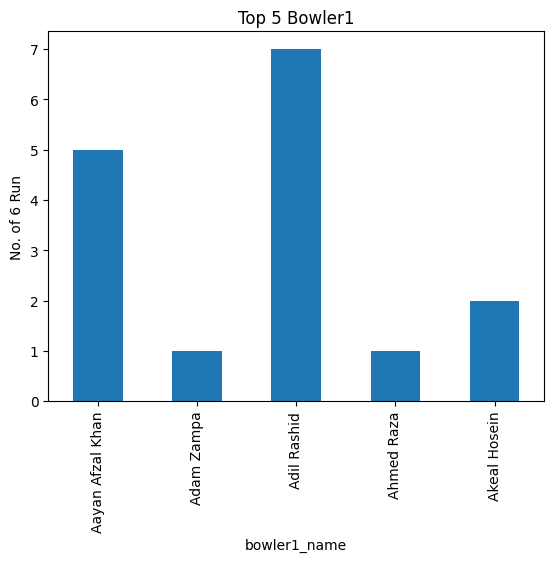

In [409]:
new_delivery2.groupby("bowler1_name")["bowler1_runs"].count().head().plot(kind="bar",ylabel="No. of 6 Run",title = "Top 5 Bowler1")

<Axes: title={'center': 'Top 5 Bowler2'}, xlabel='bowler2_name', ylabel='No. of 6 Run'>

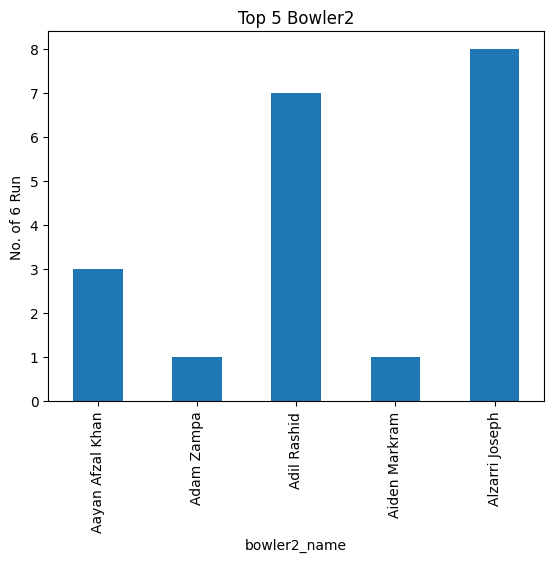

In [412]:
mask3=df['bowler2_runs']==6
new_delivery3 = df[mask3]
new_delivery3.groupby("bowler2_name")["bowler2_runs"].count()
new_delivery2.groupby("bowler2_name")["bowler2_runs"].count().head().plot(kind="bar",ylabel="No. of 6 Run",title = "Top 5 Bowler2")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')